# Conv1D Plots

## Load data

In [1]:
import h5py
import pandas as pd

In [2]:
f = h5py.File('../data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z', 'r')
treeArray = f['t_allpar_new'][()]

In [3]:
features = ['j1_ptrel','j1_etarot','j1_phirot','j1_erel','j1_deltaR','j1_costhetarel','j1_pdgid','j1_pt']
labels = ['j_g','j_q','j_w','j_z','j_t']

In [4]:
feat_df = pd.DataFrame(treeArray,columns=list(set(features)))
label_df = pd.DataFrame(treeArray,columns=list(set(labels)))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm

In [6]:
df = pd.concat([feat_df,label_df],axis=1)
df.head()

,j1_deltaR,j1_phirot,j1_etarot,j1_ptrel,j1_costhetarel,j1_erel,j1_pdgid,j1_pt,j_w,j_q,j_g,j_t,j_z
0,0.135378,-0.201170,-0.068588,0.001060,-0.068480,0.001084,111.0,1.064380,0,0,0,0,1
1,0.321080,-0.348590,-0.113826,0.000626,-0.113337,0.000640,111.0,0.570535,0,0,0,1,0
2,0.061471,0.001577,0.003166,0.046280,0.003166,0.045609,111.0,48.173332,1,0,0,0,0
3,0.015611,-0.005436,-0.015675,0.132881,-0.015673,0.133103,211.0,84.760277,0,0,1,0,0
4,0.328146,-0.006246,-0.350233,0.001762,-0.336582,0.001496,211.0,1.663202,0,0,0,1,0


In [7]:
# min-max normalization to [-1,1] for phi & eta
temp_df = df.copy()
for col in features[1:3]:
    temp_df[col] = -1 + 2*(temp_df[col]-temp_df[col].min())/(temp_df[col].max()-temp_df[col].min())
temp_df

,j1_deltaR,j1_phirot,j1_etarot,j1_ptrel,j1_costhetarel,j1_erel,j1_pdgid,j1_pt,j_w,j_q,j_g,j_t,j_z
0,0.135378,-0.138059,-0.060395,0.001060,-0.068480,0.001084,111.0,1.064380,0,0,0,0,1
1,0.321080,-0.234360,-0.072006,0.000626,-0.113337,0.000640,111.0,0.570535,0,0,0,1,0
2,0.061471,-0.005616,-0.041979,0.046280,0.003166,0.045609,111.0,48.173332,1,0,0,0,0
3,0.015611,-0.010197,-0.046815,0.132881,-0.015673,0.133103,211.0,84.760277,0,0,1,0,0
4,0.328146,-0.010726,-0.132683,0.001762,-0.336582,0.001496,211.0,1.663202,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119904,0.071287,-0.075199,-0.026894,0.003359,0.061860,0.003480,111.0,3.329199,0,0,1,0,0
5119905,0.243789,-0.184195,-0.041913,0.003650,0.003421,0.004210,111.0,3.756212,1,0,0,0,0
5119906,0.205047,-0.164942,-0.043495,0.022742,-0.002743,0.022763,2212.0,24.412260,0,0,0,0,1
5119907,0.215792,-0.113465,-0.093940,0.002943,-0.196689,0.003270,111.0,2.873118,0,0,1,0,0


## Plot

Text(0, 0.5, 'j1_phirot')

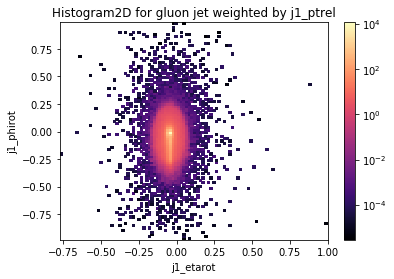

In [8]:
# Plot for Gluon
_,_,_,img = plt.hist2d(x=temp_df[temp_df['j_g']==1].j1_etarot, y=temp_df[temp_df['j_g']==1].j1_phirot,weights=temp_df[temp_df['j_g']==1].j1_ptrel,bins=100,cmap='magma',norm=LogNorm())
img
plt.colorbar()
plt.title('Histogram2D for gluon jet weighted by j1_ptrel')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')

Text(0, 0.5, 'j1_phirot')

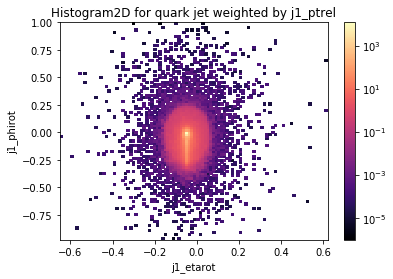

In [9]:
# Plot for Quark
_,_,_,img = plt.hist2d(x=temp_df[temp_df['j_q']==1].j1_etarot, y=temp_df[temp_df['j_q']==1].j1_phirot,weights=temp_df[temp_df['j_q']==1].j1_ptrel,bins=100,cmap='magma',norm=LogNorm())
img
plt.colorbar()
plt.title('Histogram2D for quark jet weighted by j1_ptrel')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')

Text(0, 0.5, 'j1_phirot')

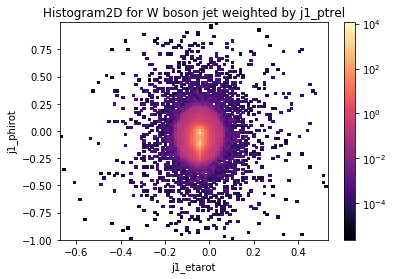

In [10]:
# Plot for W boson
_,_,_,img = plt.hist2d(x=temp_df[temp_df['j_w']==1].j1_etarot, y=temp_df[temp_df['j_w']==1].j1_phirot,weights=temp_df[temp_df['j_w']==1].j1_ptrel,bins=100,cmap='magma',norm=LogNorm())
img
plt.colorbar()
plt.title('Histogram2D for W boson jet weighted by j1_ptrel')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')

Text(0, 0.5, 'j1_phirot')

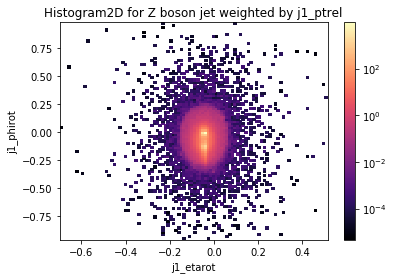

In [11]:
# Plot for Z boson
_,_,_,img = plt.hist2d(x=temp_df[temp_df['j_z']==1].j1_etarot, y=temp_df[temp_df['j_z']==1].j1_phirot,weights=temp_df[temp_df['j_z']==1].j1_ptrel,bins=100,cmap='magma',norm=LogNorm())
img
plt.colorbar()
plt.title('Histogram2D for Z boson jet weighted by j1_ptrel')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')

Text(0, 0.5, 'j1_phirot')

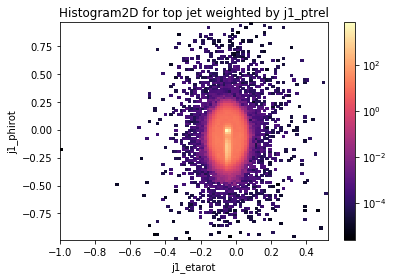

In [12]:
# Plot for Top
_,_,_,img = plt.hist2d(x=temp_df[temp_df['j_t']==1].j1_etarot, y=temp_df[temp_df['j_t']==1].j1_phirot,weights=temp_df[temp_df['j_t']==1].j1_ptrel,bins=100,cmap='magma',norm=LogNorm())
img
plt.colorbar()
plt.title('Histogram2D for top jet weighted by j1_ptrel')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')